## Problem Coding A

I added a function to jk_test.py called heun4:

    def heun4(coeff, y, derivs):
      k1 = coeff.dt * derivs(coeff,y)
      k2 = coeff.dt * derivs(coeff,y + ((2/3) * k1))
      ynew = y + ((1/4) * k1) + ((3/4) * k2)
      return ynew

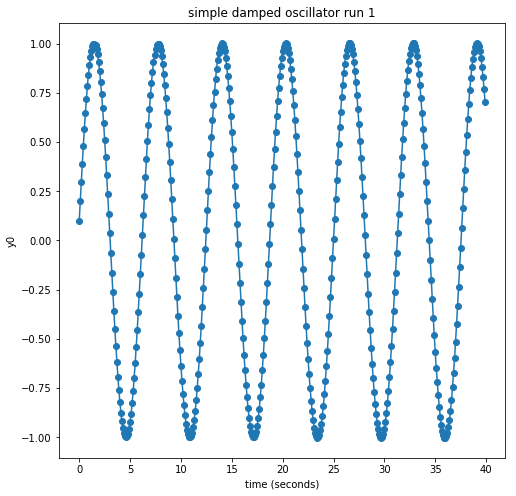

In [6]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import json
from numlabs.lab4.example.jk_test import read_init
import numlabs.lab4.example.jk_test as jktest
from importlib import reload
reload(jktest)
heun4=jktest.heun4
#from jktest import heun4
# #
# specify the derivs function
#
def derivs(coeff, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivitive
  f[0]=y[1]
  f[1]= -1.*coeff.c1*y[1] - coeff.c2*y[0]
  return f
#
# first make sure we have an input file in this directory
#
initialVals={'yinitial': [0.,1.],'t_beg':0.,'t_end':40.,'dt':0.1,'c1':0,'c2':1.}
initialVals['comment'] = 'written Sep. 29, 2015'
initialVals['plot_title'] = 'simple damped oscillator run 1'

infile='run_1.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff
#
        
infile='run_1.json'
coeff=read_init(infile)

#
# integrate and save the result in savedata
#
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)  #creates a marching time period from t_beg to t_eng by dt
y=coeff.yinitial   #sets variable y to initial y value, which is 0 and 1
nsteps=len(time)   #returns number of time steps, assigns to variable nsteps
savedata=np.empty([nsteps],np.float64)   #creates an empty array called savedata, with number of values with number of timesteps, as float
for i in range(nsteps):       #initiates a loop for as many times as there are time steps
    y=heun4(coeff,y,derivs)  #for each time step, sends coeff, y, and derivs to euler routine, returns new y 
    savedata[i]=y[0]  #for each time step, initializes y

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
theAx.plot(time,savedata,'o-')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0')    

## Problem Coding B

1. See below for code and plot; tried initial values of 0,1 and 2,5

2. There was no difference between the two plots.

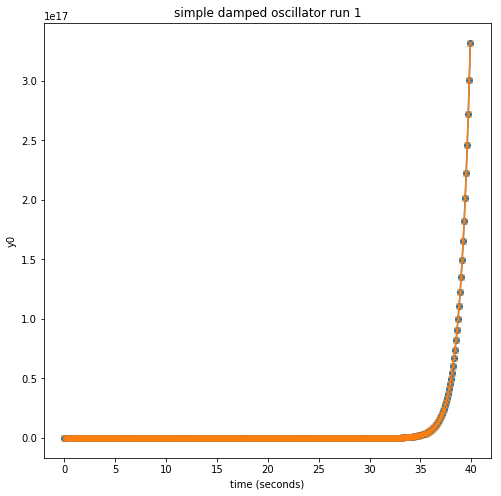

In [20]:
#test equation

%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import json
from numlabs.lab4.example.jk_test import read_init,heun4,midpoint4

# 
# specify the derivs function
#
def derivs(coeff, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivitive
  f[0]=y[1]
  f[1]=y[0]+1
  return f
#
# first make sure we have an input file in this directory

initialVals={'yinitial': [1,1.],'t_beg':0.,'t_end':40.,'dt':0.1,'c1':1.,'c2':1.}
initialVals['comment'] = 'written Sep. 29, 2015'
initialVals['plot_title'] = 'simple damped oscillator run 1'

infile='run_1.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff
#
        
infile='run_1.json'
coeff=read_init(infile)

#
# integrate and save the result in savedata
#
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)  #creates a marching time period from t_beg to t_eng by dt
y=coeff.yinitial   #sets variable y to initial y value, which is 0 and 1
nsteps=len(time)   #returns number of time steps, assigns to variable nsteps
savedata=np.empty([nsteps],np.float64)   #creates an empty array called savedata, with number of values with number of timesteps, as float
for i in range(nsteps):       #initiates a loop for as many times as there are time steps
    y=midpoint4(coeff,y,derivs)  #for each time step, sends coeff, y, and derivs to euler routine, returns new y 
    savedata[i]=y[0]  #for each time step, initializes y    

    
# Heun Method
    
# 
# specify the derivs function
#
def derivs(coeff, y2):
  f=np.empty_like(y2) #create a 2 element vector to hold the derivitive
  f[0]=y2[1]
  f[1]=y2[0]+1
  return f
#
# first make sure we have an input file in this directory
#
initialVals={'yinitial': [1,1.],'t_beg':0.,'t_end':40.,'dt':0.1,'c1':0.,'c2':1.}
initialVals['comment'] = 'written Sep. 29, 2015'
initialVals['plot_title'] = 'simple damped oscillator run 2'

infile='run_2.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff
#
        
infile='run_2.json'
coeff2=read_init(infile)
time2=np.arange(coeff2.t_beg,coeff2.t_end,coeff2.dt)  #creates a marching time period from t_beg to t_eng by dt
y2=coeff2.yinitial   #sets variable y to initial y value, which is 0 and 1
nsteps2=len(time2)   #returns number of time steps, assigns to variable nsteps
savedata2=np.empty([nsteps2],np.float64)   #creates an empty array called savedata, with number of values with number of timesteps, as float
for i in range(nsteps2):       #initiates a loop for as many times as there are time steps
    y2=heun4(coeff2,y2,derivs)  #for each time step, sends coeff, y, and derivs to euler routine, returns new y 
    savedata2[i]=y2[0]  #for each time step, initializes y    

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
theAx.plot(time,savedata,'o-')
theAx.plot(time2,savedata2,'x-')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0')   

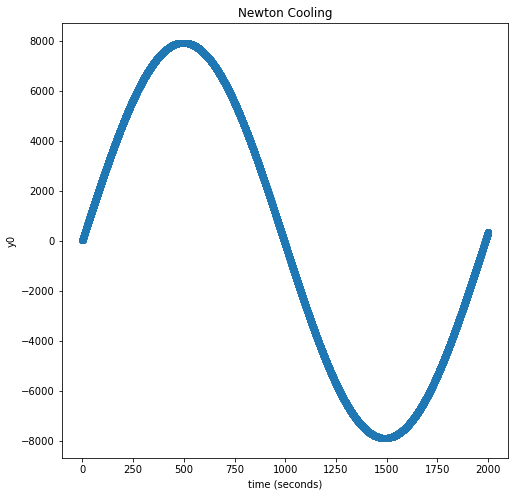

In [47]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import json
from numlabs.lab4.example.jk_test import read_init
import numlabs.lab4.example.jk_test as jktest
from importlib import reload
reload(jktest)
heun4=jktest.heun4
#from jktest import heun4
# #
# specify the derivs function
#
def derivs(coeff, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivitive
  f[0]= y[1]
  f[1]= -1.*coeff.c1*(y[0]-20)
  return f
#
# first make sure we have an input file in this directory
#
initialVals={'yinitial': [25,25.],'t_beg':0.,'t_end':2000.,'dt':0.1,'c1':0.00001,'c2':1.}
initialVals['comment'] = 'written oct 2017'
initialVals['plot_title'] = 'Newton Cooling'

infile='run_3.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff
#
        
infile='run_3.json'
coeff=read_init(infile)

#
# integrate and save the result in savedata
#
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)  #creates a marching time period from t_beg to t_eng by dt
y=coeff.yinitial   #sets variable y to initial y value, which is 25 degrees
nsteps=len(time)   #returns number of time steps, assigns to variable nsteps
savedata=np.empty([nsteps],np.float64)   #creates an empty array called savedata, with number of values with number of timesteps, as float
for i in range(nsteps):       #initiates a loop for as many times as there are time steps
    y=heun4(coeff,y,derivs)  #for each time step, sends coeff, y, and derivs to euler routine, returns new y 
    savedata[i]=y[0]  #for each time step, initializes y
    
theFig,theAx=plt.subplots(1,1,figsize=(8,8))
theAx.plot(time,savedata,'o-')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0')    


Can't figure out how to use the derivs function properly...I know (think) I need to modify the equations there so it can be sent to the discretizing functions, but don't know how to modify f() accordingly....sorry
